## Tick Population versus Weather Factors
*A computational essay by Cherry Pham, Lili Baker, and Tara Lee, students at Olin College of Engineering*
### Introduction: 
To what extent do different weather factors correlate with the number of ticks found in Massachusetts? According to the CDC, there were 50,865 reported cases of tick borne disease in 2019 in the US. Although not all tick bites carry diseases, those that do can be life threatening, however, the danger in ticks vary in location and weather conditions. In this computational essay, we are going to look at the correlation between tick population and weather patterns (precipitation and relative humidity) in Harvard Forest & Quabbin Watershed, a NEON field site about 60 miles from Olin College of Engineering managed by Harvard University. According to the data collection website, the National Ecological Observatory Network, “during the growing season, sampling is conducted every three weeks at sites where more than five ticks have been detected in the last year and every six weeks elsewhere. Sampling also occurs only if the high temperature on two consecutive days prior to planned sampling exceeds 0 °C, and the ground is dry.” In this computational essay, we are accessing the tick population, relative humidity, and precipitation data from NEON using an API. We will use graphs to display this data to show the correlations between tick population and our chosen weather patterns. This information will be useful for us to know in our location at Olin College of Engineering, in which weather conditions may correlate to the presence of ticks. It is important to note that relative humidity is not the same as absolute humidity. Relative humidity is the measure of the actual amount of water vapor in the air in relation to the total amount of water vapor that can exist in the air at a given temperature, expressed as a percentage. Absolute humidity is the measure of water vapor in the air regardless of the air's temperature. This means that for a certain absolute humidity, if the temperature of the air drops, there will be a higher relative humidity but if the temperature of the air increases, there will be a lower relative humidity. We chose relative humidity and precipitation as our weather factors because they are representative of different weather scenarios (as opposed to doing absolute humidity and precipitation, which would show very similar results) and because these were the most plausible and comprehensible choices of all data collected from the same site and time as the ticks.


### Methodology:
To start, we imported the necessary py packages: pandas for data manipulation and analysis, requests for processing the API from the NEON site, matplotlib for plotting, and json for formatting.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import neon_data_tools
import data_analyzer
import data_plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Then, we use the dpID for each dataset, accessing the tick data, the relative humidity data, and the precipitation data. We are choosing our dates by the months in which there is data for all three datasets. Relative humidity is the amount of water vapor content in the air, expressed as a percentage of the maximum amount possible. Precipitation is measured in milimeters of all liquid and solid water particles from the atmosphere that reach the ground. The ticks are measured by population, and are collected using a drag cloth in certain defined plots of land. Below, we define the variables in order to access the corresponding dates, datasets, dpIDs, and the file names.

As seen in data_analyzer.py, in order to process the tick data, we add up the number of ticks for each month. Although the data set has other information, such as the specific plot the tick was found in and the specific classification of ticks, we only want the number of ticks found on a certain date, so we filter the data so that our array just returns the date and time the data was collected as well as the number of ticks found during that time.

Similarly, relative humidity and precipitation data for the same location are filtered so that only the date and time with the relative humidity and the number of milimeters of precipitation are added to the corresponding arrays. To process this data, we averaged the total values for each month.

In [4]:
site = "HARV"
dates = neon_data_tools.get_dates(4,10,2017,2017)[0]
datasets = ["ticks", "relative humidity", 'precipitation']
independent_dataset_names = ["Humidity", "Precipitation"]
dpIDs = {"ticks": "DP1.10093.001", "relative humidity": "DP1.00098.001", "precipitation": "DP1.00006.001"}
file_names = {"ticks": [], "relative humidity": [], "precipitation": []}

[0] is tick dataframe, [1] is relative humidity dataframe, [2] is precipitation dataframe. This downloads each dataset using the API, defined in the variables above and store it in an array using Pandas.

In [5]:
file_names = neon_data_tools.download_all_datasets(file_names, datasets, dpIDs, site, dates)
stacked_dataframes = neon_data_tools.create_stacked_dataframe(file_names)


In [6]:
ticks = data_analyzer.tick_analyze(stacked_dataframes[0])
humid = data_analyzer.humidity_analyze(stacked_dataframes[1])
precip = data_analyzer.precipitation_analyze(stacked_dataframes[2])

### Results
We are using this data to show a line plot of the change in tick population, precipitation, and relative humidity over time, a scatter plot with a linear regression line of relative humidity versus tick population, a scatter plot with a linear regression line of precipitation versus tick population, and a bar graph comparing the two correlation coefficients.

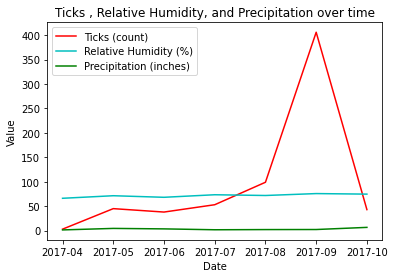

In [7]:
#Line plots of the change in tick population, precipitation, and relative humidity over time
data_plotting.plot_combined_line_graph(dates, [ticks, humid, precip], ["Ticks (count)", "Relative Humidity (%)", "Precipitation (inches)"])

This plot represents the total number of ticks collected each month, total precipitation measured each month, and the total relative humidity each month, showing the change in these datasets over time. Between April 2017 and August 2017, the tick population is shown to increase by about 190 ticks. Relative humidity shows a slight increase, and precipitation rises during the month of May, but then stays relatively stable during June, July, and August.

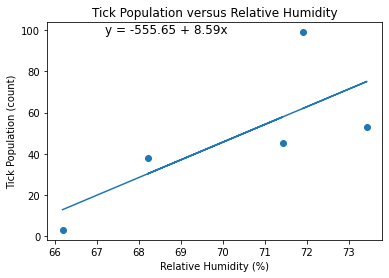

In [9]:
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Tick Population (count)")
plt.title("Tick Population versus Relative Humidity")
data_plotting.perform_linear_regression(humid, ticks)
data_plotting.plot_line_of_best_fit(humid, ticks)

The above plot displays a strong correlation between tick population and relative humidity. This shows that as relative humidity increases, the tick population increases.

Next, we can plot the relationship between tick population and precipitation.

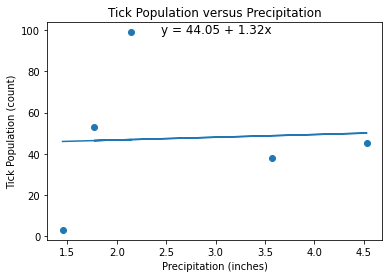

In [10]:
plt.xlabel("Precipitation (inches)")
plt.ylabel("Tick Population (count)")
plt.title("Tick Population versus Precipitation")
data_plotting.perform_linear_regression(precip, ticks)
data_plotting.plot_line_of_best_fit(precip, ticks)

From this plot, we can see that precipitation has a relatively low correlation with tick population. The slope of the linear regression line for precipitation is 1.32, much less than it is for humidity, which as a slope of 8.59.

In the next graph, we will compare the correlation coefficients between Tick Population versus Relative Humidity and Tick Population versus Precipitation.

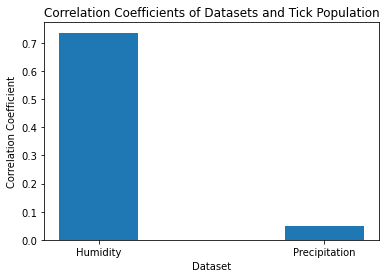

{'Humidity': 0.736, 'Precipitation': 0.05}

In [11]:
data_plotting.plot_correlation_coefficients(independent_dataset_names, [humid, precip], ticks)
data_plotting.get_correlation_coefficients(independent_dataset_names, [humid, precip], ticks)

The above plot compares the two correlation coefficients for our two weather factors. We can see that the correlation coefficient for our data of Tick Population versus Relative Humidity is 0.736 while our data for Tick Population versus Precipitation is 0.05.

### Interpretation


What are the important insights that the reader should get from this project?
What are the contextual or ethical implications of your topic or work?
What lessons did you learn as you did the project?
What were the most difficult, challenging, or frustrating parts of the project?
In what ways would you extend or change your project if you had more time?

The essay draws reasonably sound conclusions from the results.
The essay describes important insights and lessons from this project.
The essay addresses any contextual or ethical implications of the project.
The essay reflects on the project work, addressing difficulties and potential future work.

Based on our graphs, one may suggest that as relative humidity increases, the occurences of ticks also increase. It also suggests that precipitation has no impact on tick population. However, our data is taken over the course of five months, which is a limited amount of time, and 
The relationship between tick population and relative humidity could be due to other things, such as 